# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Columns:
- id: id of movie
- imdb_id: id of movie on IMDB
- popularity: popularity score of movie
- budget: total money spent in production and release of movie
- revenue: total money received in sales of movie
- original_title: the title of the movie
- cast: a list of some of the cast in the movie
- homepage: movie website
- director: director of the movie
- tagline: tagline of movie
- keywords: keyword of movie
- overview: summary of movie
- runtime: length of the movie
- genres: genres associated with movie
- production_companies: companies involved in thre production - of movie
- release_date: date when movie was released
- vote_count: number of votes casted for movie
- vote_average: average of the vote score movie received
- release_year: year movie was released in
- budget_adj: budget taking account for inflation over the - years in terms of 2010 dollars
- revenue_adj: revenue taking account for inflation over the - years in terms of 2010 dollars

Questions of study ?

- Which genres are most popular from year to year?
- What are the most popular movies ?
- Are popular movies more profitable ?
- What keywords are the most popular ?
- What are the most profitable genres ?
- Are certain production companies more successful or profitable ?
- What are the most profitable movies ?
- How succesful as the movie industry been over the years ?
- Does runtime of a movie in anyway affects profit ?
- What kinds of features are associated with movies that have high revenues?

In [1]:
# Packages to be used

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# DEFAULT_TITLE handles setting plot title to default text
DEFAULT_TITLE = 'default'

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Read in dataset and print out 3 random rows
df = pd.read_csv('tmdb-movies.csv')
df.sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
231,319075,tt4229236,0.569443,0,0,Cobain: Montage of Heck,Kurt Cobain|Dave Grohl|Courtney Love|Krist Nov...,NaN,Brett Morgen,NaN,...,The authorized documentary on late Guitar/lead...,132,Music|Documentary,HBO Documentary Films|Public Road Productions,3/23/15,197,7.5,2015,0.000000e+00,0.000000e+00
6660,1262,tt0420223,0.713697,30000000,53653224,Stranger Than Fiction,Will Ferrell|Maggie Gyllenhaal|Dustin Hoffman|...,http://www.sonypictures.com/homevideo/stranger...,Marc Forster,Harold Crick isn't ready to go. Period.,...,Everybody knows that your life is a story. But...,113,Comedy|Drama|Fantasy|Romance,Mandate Pictures|Three Strange Angels,9/9/06,378,6.9,2006,3.245007e+07,5.803504e+07
308,327528,tt2133196,0.396791,0,830129,Born to Be Blue,Ethan Hawke|Carmen Ejogo|Callum Keith Rennie|S...,NaN,Robert Budreau,Love is instramental,...,Jazz legend Chet Baker finds love and redempti...,97,Drama|Music,New Real Films|Lumanity Production,9/13/15,16,6.8,2015,0.000000e+00,7.637183e+05


In [3]:
# Inspecting Data to have an overview of the columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Conclusion

#### This dataset has 21 columns and 10866 rows
#### The data types of the columns seem to be okay, except release_date
#### release_date should be a datetime type
#### Some coulmns here also will not be needed since they don't help us answer our questions


In [4]:
# We check for null values
# Null values may bias our analyis

no_of_null_rows = df.isnull().any(axis=1).sum()
print("Number of null rows is", no_of_null_rows)
df.isnull().sum()

Number of null rows is 8874


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Conclusion

#### We have 8,874 rows with null values
#### It would be noted that most of this columns with null values are non-numeric

In [5]:
# Let's check for outliers or errant data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Conclusion

#### From this brief description
#### We can see the most poular movie has a score of 32.99
#### The least popular movie has a score of .000065
#### The highest budget for a movie is 425,000,000
#### The lowest budget for a movie is 0 which is strange, this is an errant row that should be removed
#### The highest revenue for a movie is 2,781,506,000
#### The lowest revenue for a movie is 0 which is strange, this is also an errant row that should be removed
#### The highest run time of a movie here is 900 minutes
#### The lowest runtime of a movie is 0
#### The oldest movie here was released in 1960
#### The latest movie here was released in 2015
#### The highest budget_adj for a movie is 425,000,000
#### The lowest budget_adj for a movie is 0 which is strange, this is an errant row that should be removed
#### The highest revenue_adj for a movie is 2,827,124,000
#### The lowest revenue_adj for a movie is 0 which is strange, this is also

In [6]:
# We check for duplicates
# duplicates here are rows with same values throughout
# duplicates can also bias our data
df.duplicated().sum()

1

#### Conclusion

#### We have only one duplicate, which we will have to drop.

### Data Cleaning (Deduping!)

In [7]:
# Remove duplicates since the rows are the same
df.drop_duplicates(inplace=True)

# Check if duplicates are gone
df.duplicated().sum()

0

### Data Cleaning (Dropping Unneeded columns!)

In [8]:
# Remove unneeded columns, which don't aid our analysis
# Dropped budget and revenue, because i would use budget_adj and revenue_adj which are more current and account for inflation
# I dropped release_date since release_year is available
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview', 'release_date'], axis=1, inplace=True)

# Confirming those columns no longer exist
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'keywords',
       'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

### Data Cleaning (Dropping Rows with missing values)

In [9]:
# To prevent bias of data, I chose to drop all null values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Check to confirm there are no more null values
df.isnull().any(axis=1).sum()

0

### Data Cleaning (budget_adj and revenue_adj)

In [10]:
# replace rows with o as budget_adj and revenue_adj with NaN
# so that they won't be used in our analysis
cols = ["budget_adj", "revenue_adj"]
df[cols] = df[cols].replace({'0':np.nan, 0:np.nan})

# Check if such rows still exist
print((df.budget_adj == 0).any())
print((df.revenue_adj == 0).any())

False
False


### Data Cleaning ( Splitting Columns with values separated by | )

In [11]:
# Splitting columns that contain the pipe symbol to a list for easy explosion later on
split_cols = ['cast', 'genres', 'production_companies', 'keywords']
for col in split_cols:
    df[col] = df[col].apply(lambda x: x.split('|'))

### Add New Column for Profit
#### To answer questions on profitability easily
#### We can create a new column for net_profit
#### From the subtraction of revenue_adj and budget_adj

In [12]:
df['net_profit'] = df['revenue_adj'] - df['budget_adj']

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are most popular from year to year ?)

In [13]:

# We explode the dataframe on the genre columns
# This places each genre for a paricular movie on different rows
# This will help us analyze the genre variables further
genre_exploded = df.explode('genres', ignore_index=True)
genre_exploded.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,Action,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,Adventure,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
2,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,Science Fiction,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
3,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,Thriller,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
4,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,Action,"[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


In [31]:
# Handles plotting of graph
def graphPlotter(df, kind, xVar, yVar, title):
       
    '''
    Plots graph of specific kind with specified variables and title

    Parameters:
        df (pd.Dataframe):The dataframe to be used for plot
        kind (str):The kind of plot
        xVar(str):The variable to be used on x-axis
        yVar(str):The variable to be used on y-axis
        title(str):The title of the plot

    Output:
        matplotlib.axes.Axes or numpy.ndarray of them   
    '''
    
    # plot
    df.plot(kind=kind, x=xVar, y=yVar, figsize=[14, 5])
    
    # tidy labels
    # replace _ with a space
    xVar = xVar.replace("_", " ")
    yVar = yVar.replace("_", " ")
    
    # Graph Title
    if title == 'default':
        title = f'Relationship between {yVar} and {xVar}'.title()
    plt.title(title.title(), fontsize=14, weight='bold')
    
    # xlabel Formatter
    plt.xlabel(xVar.title(), fontsize=10, weight='bold')
    
    # ylabel Formatter
    plt.ylabel(yVar.title(), fontsize=10, weight='bold');

C:\Users\HP\AppData\Local\Temp\ipykernel_19068\2288620518.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


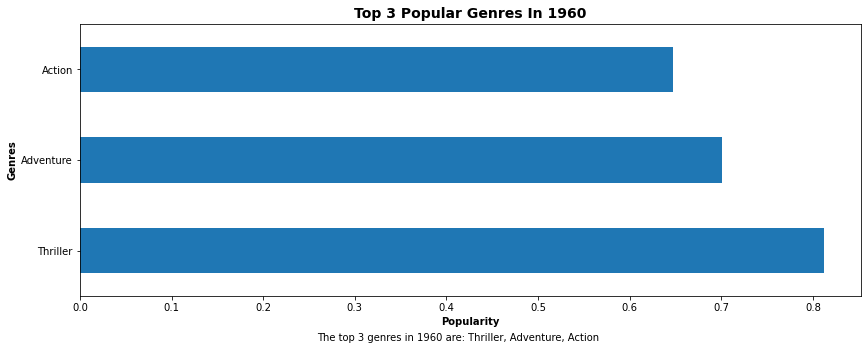

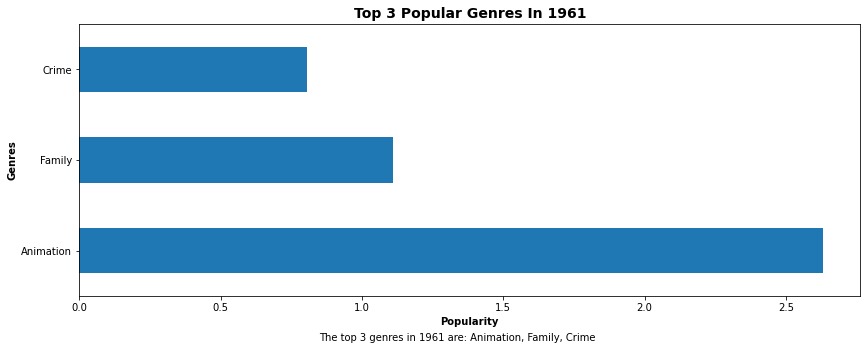

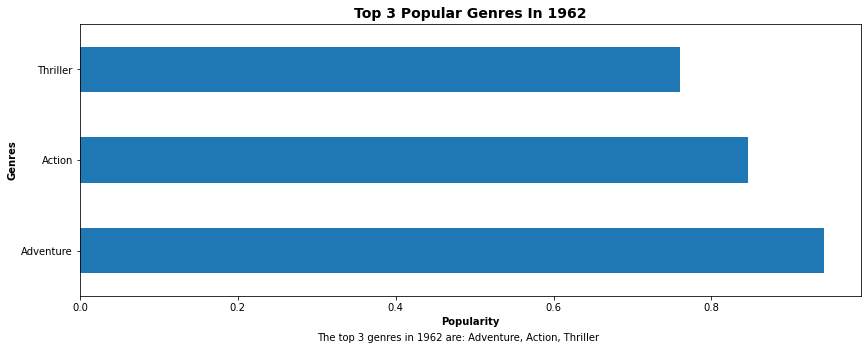

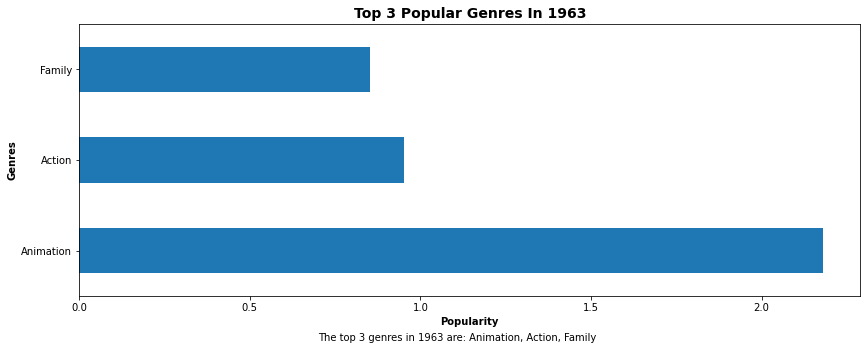

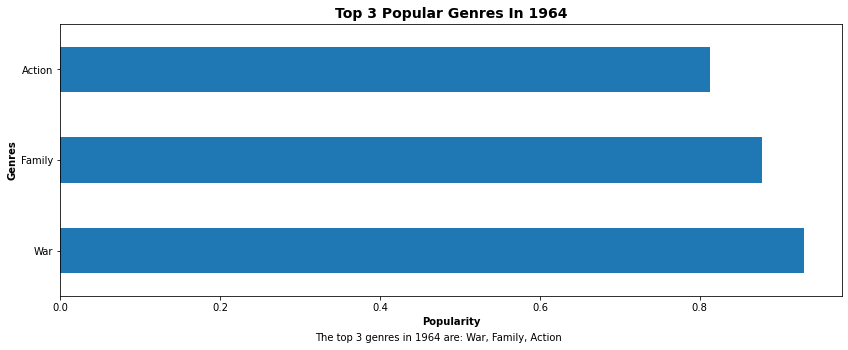

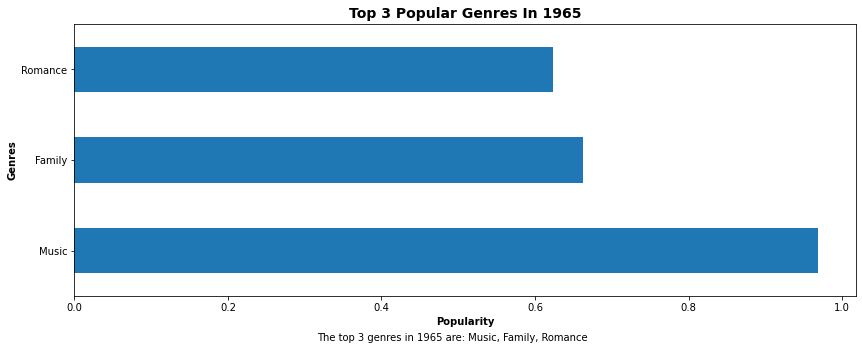

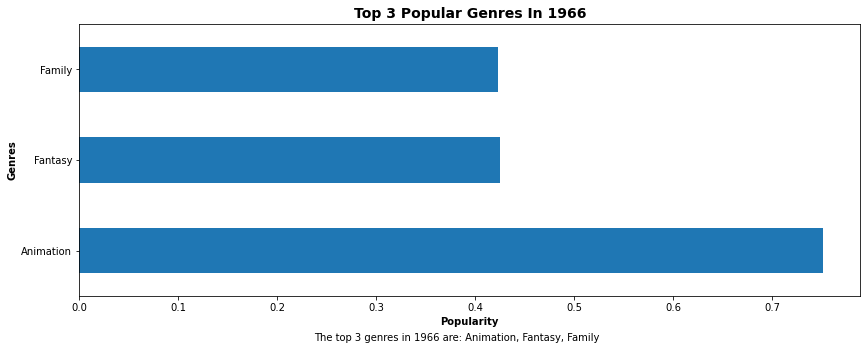

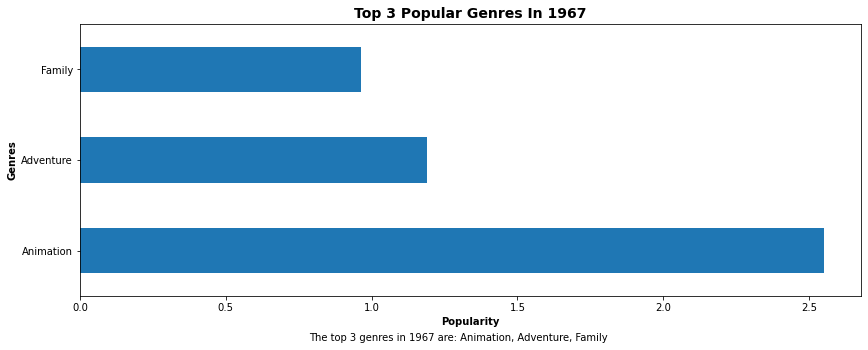

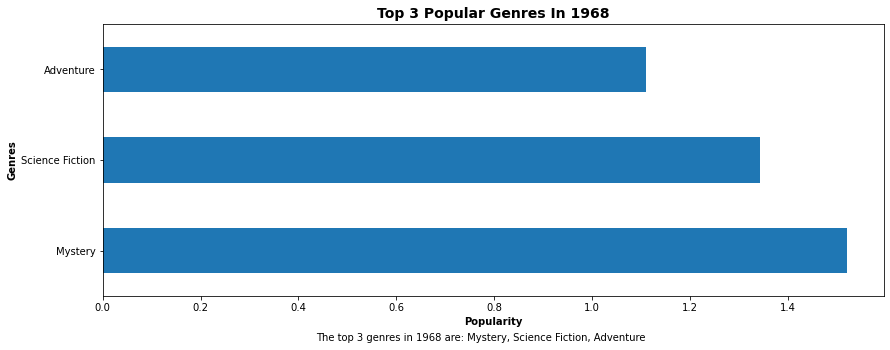

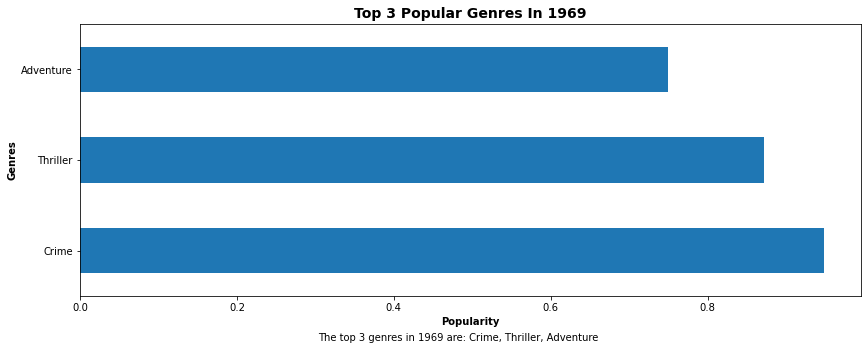

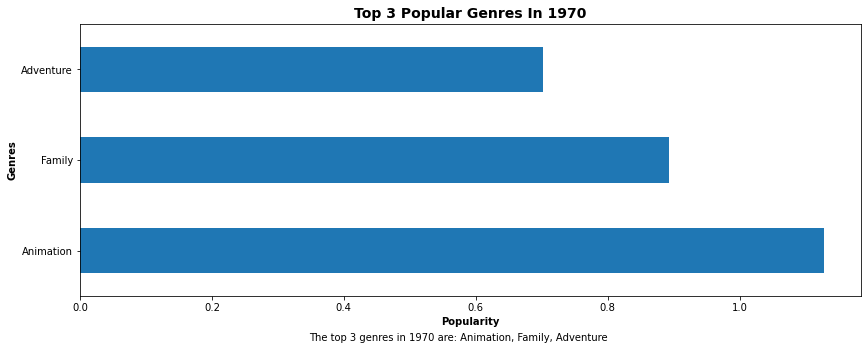

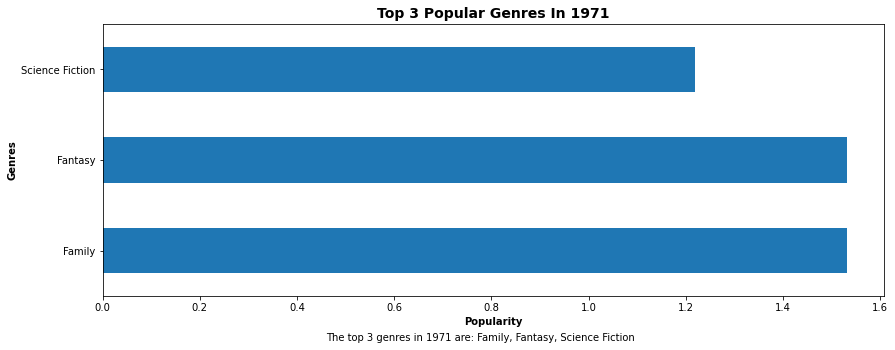

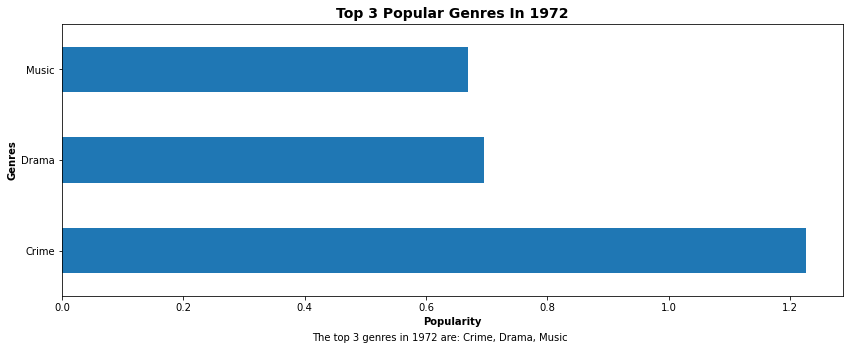

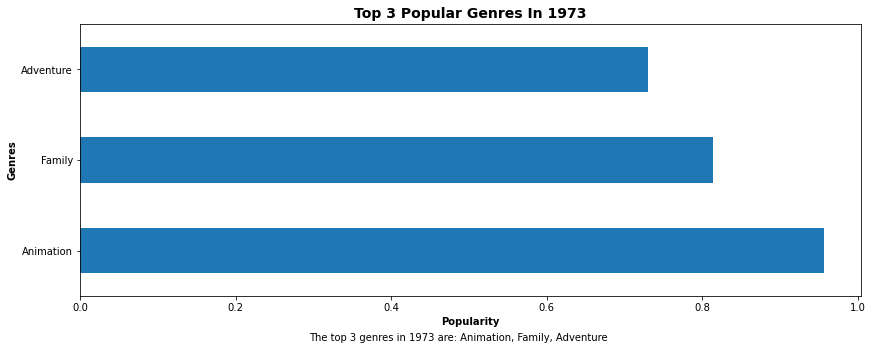

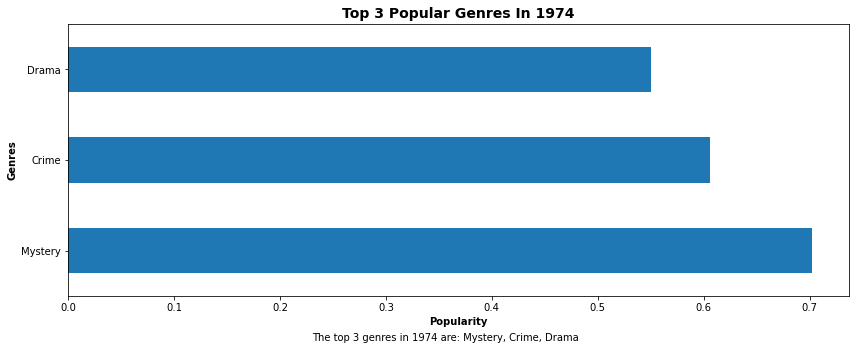

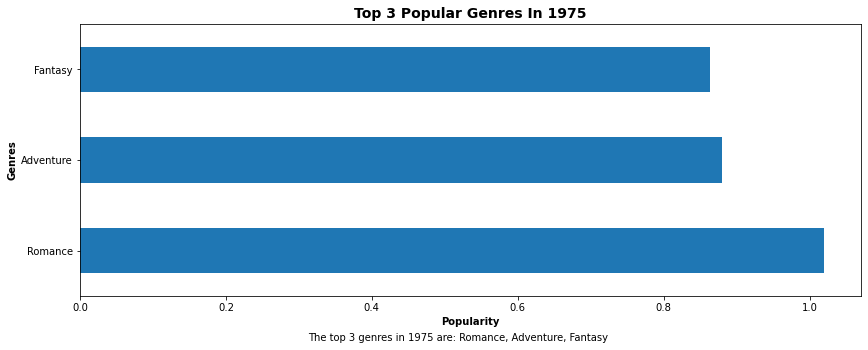

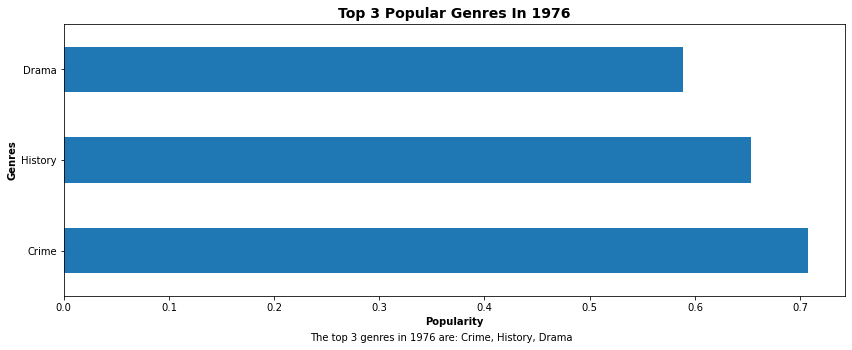

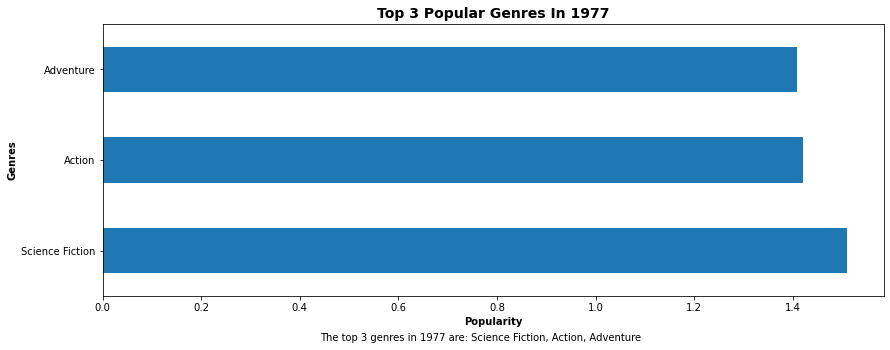

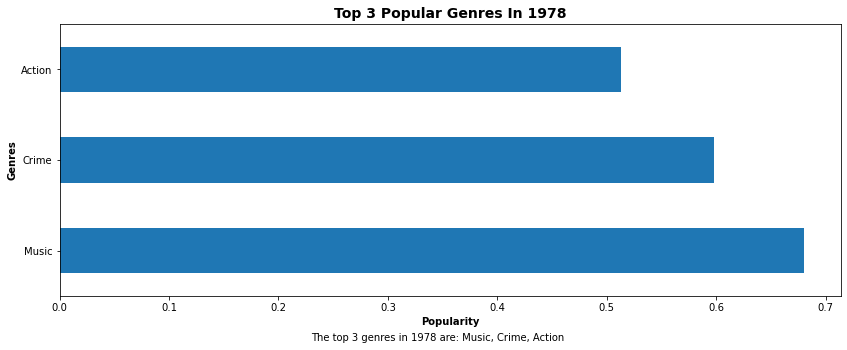

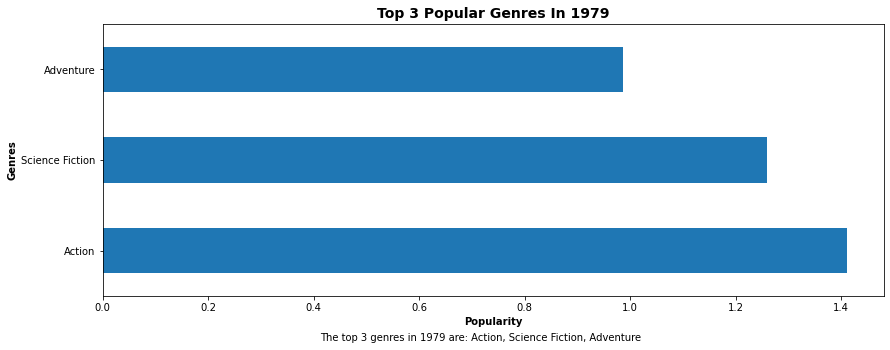

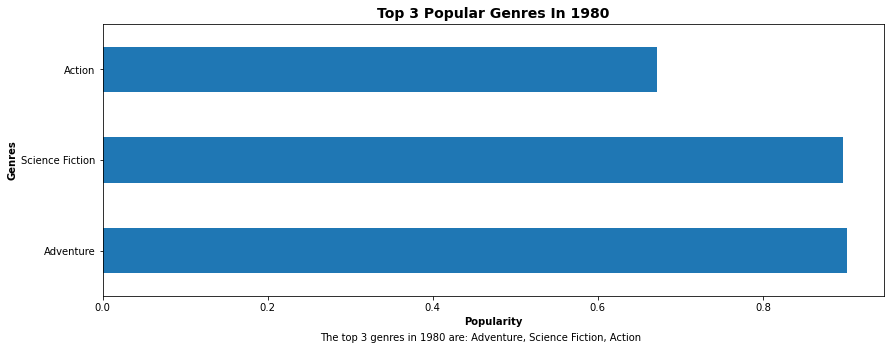

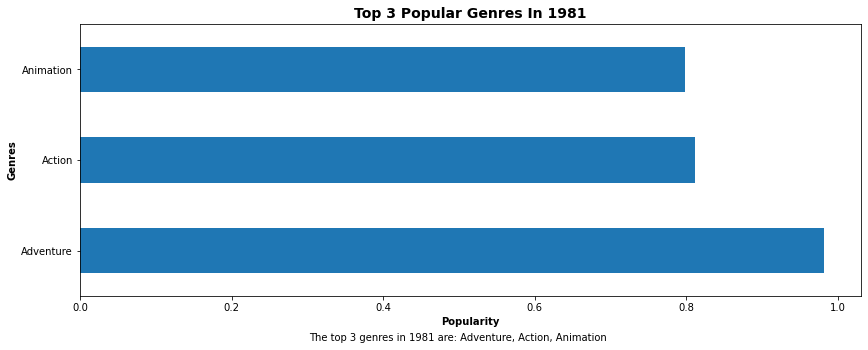

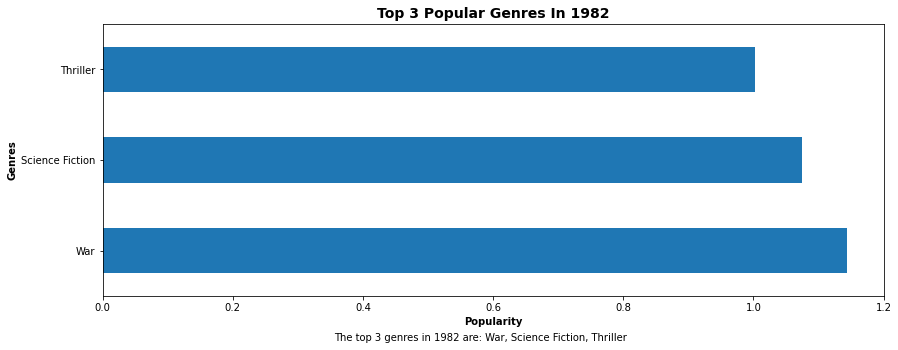

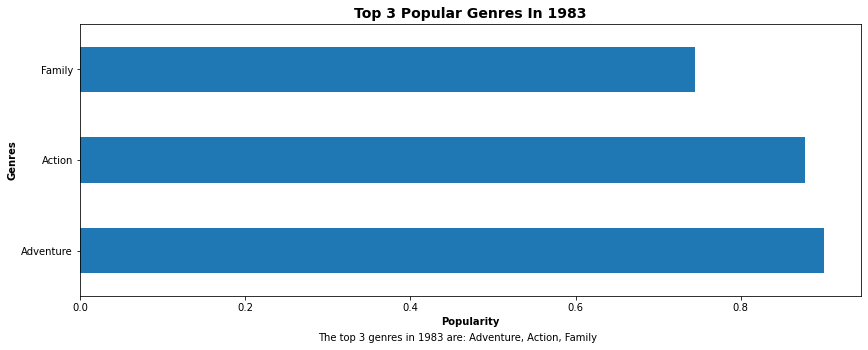

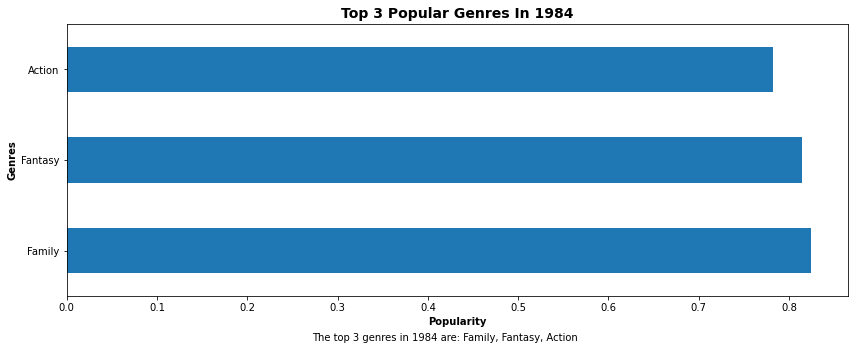

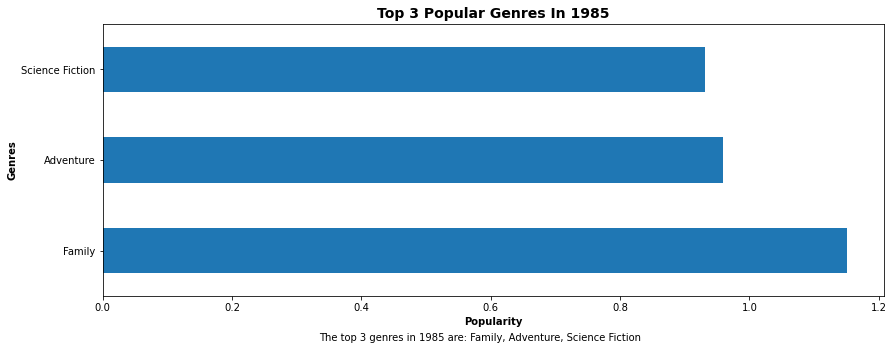

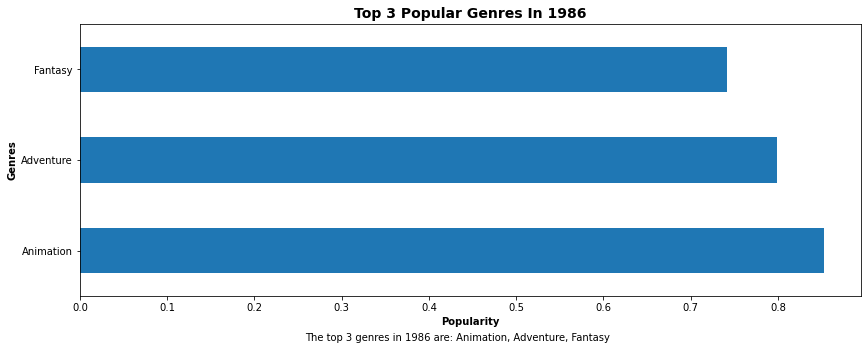

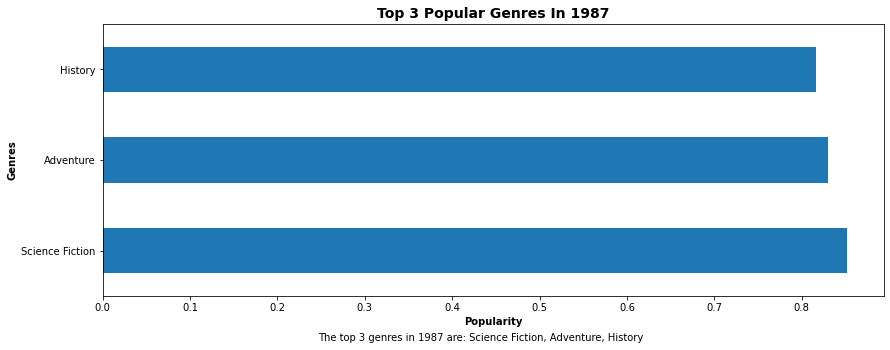

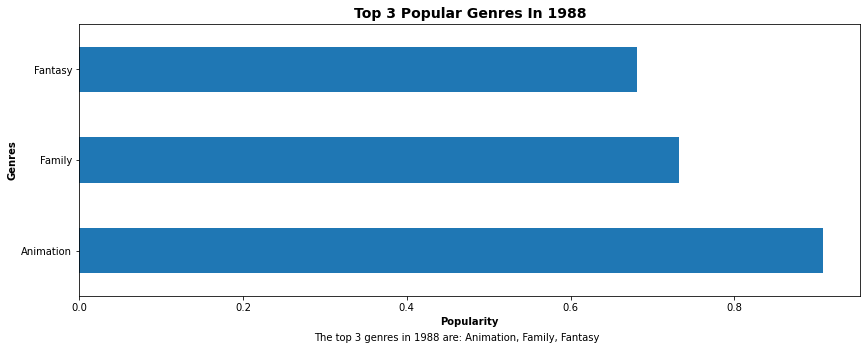

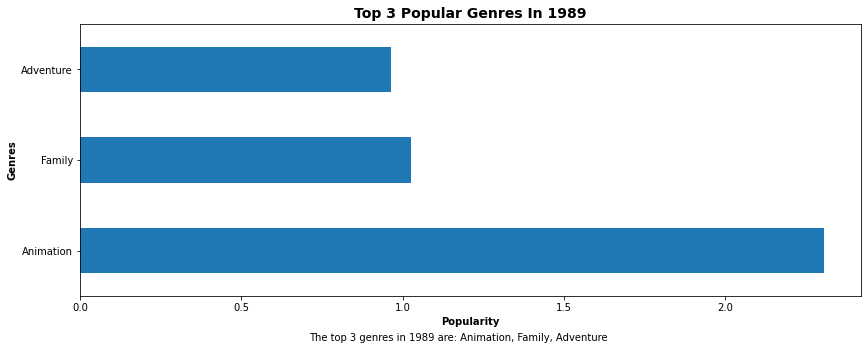

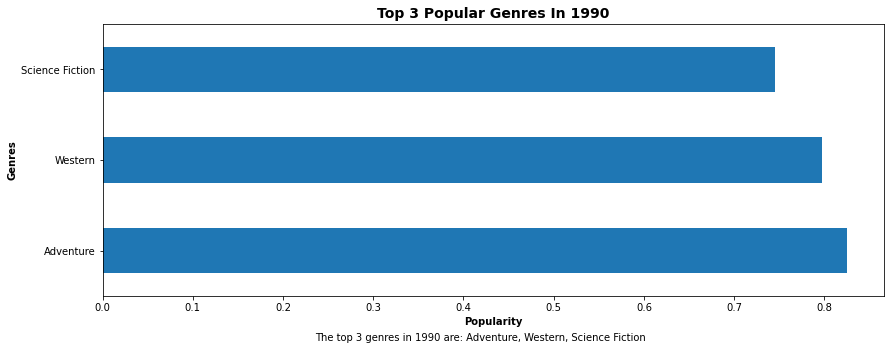

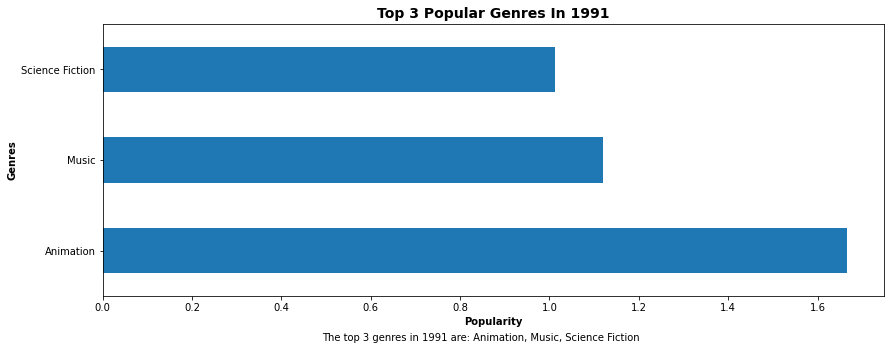

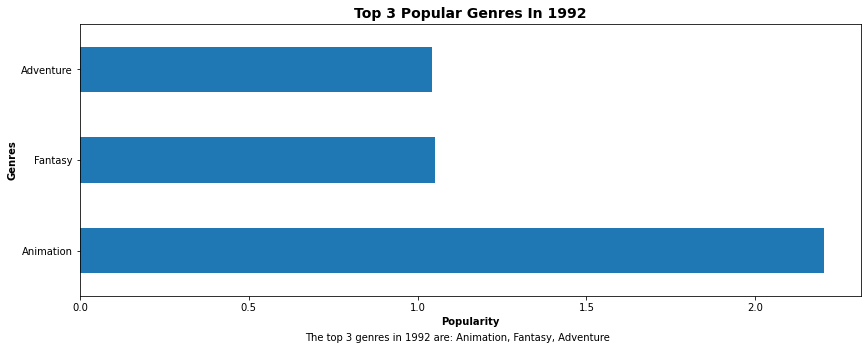

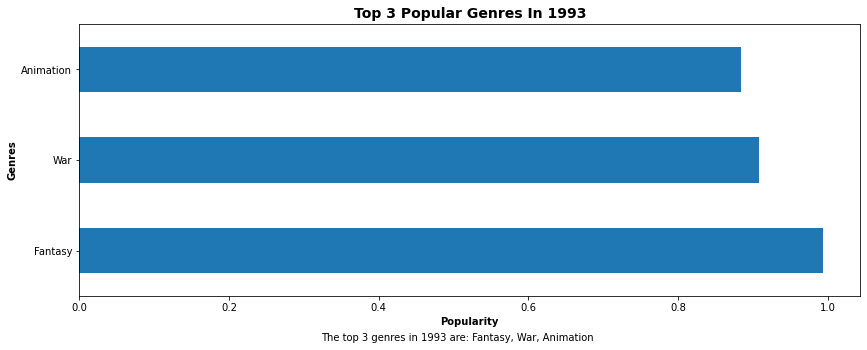

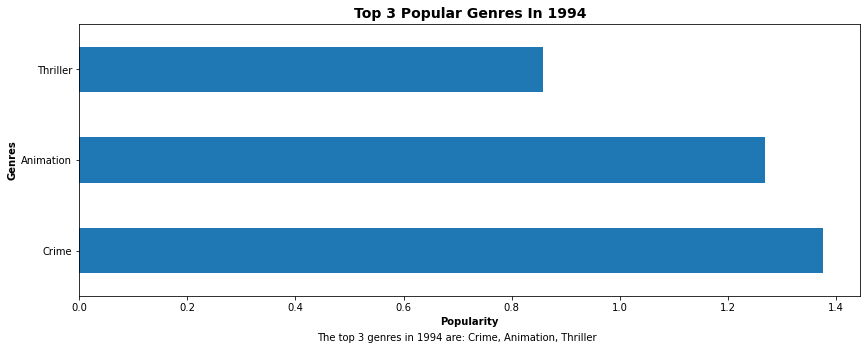

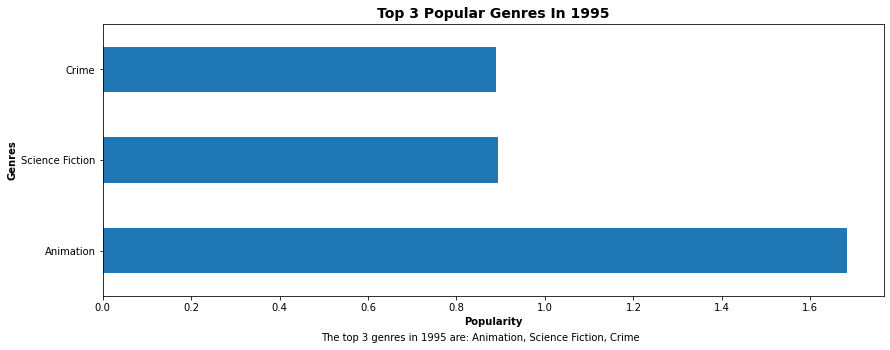

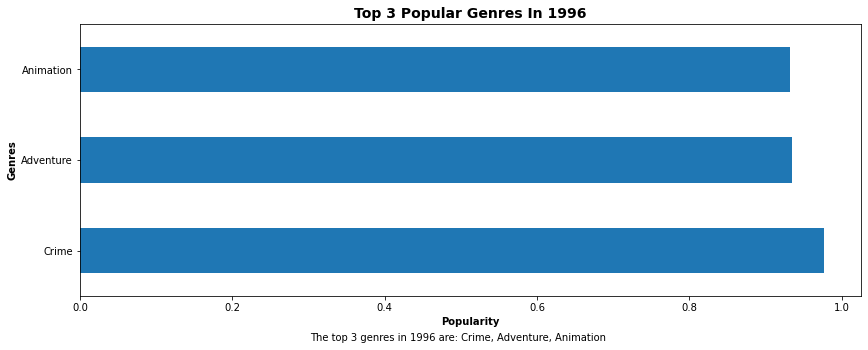

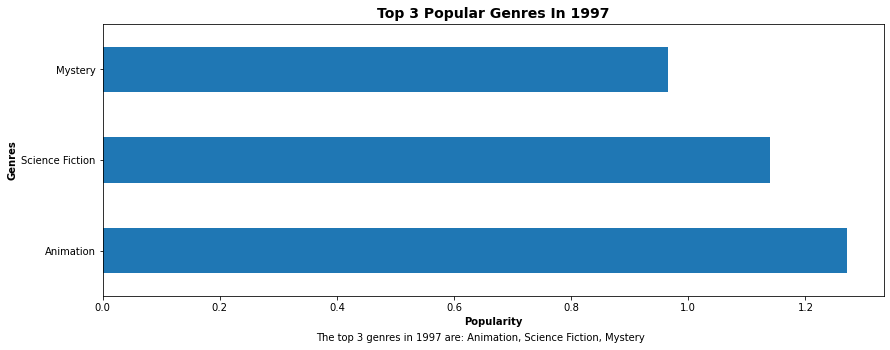

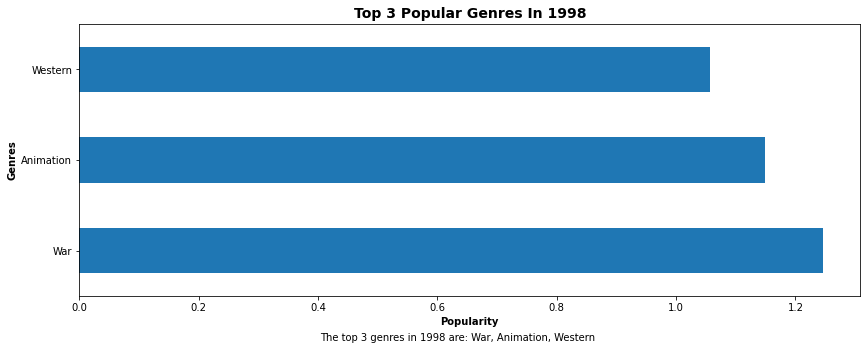

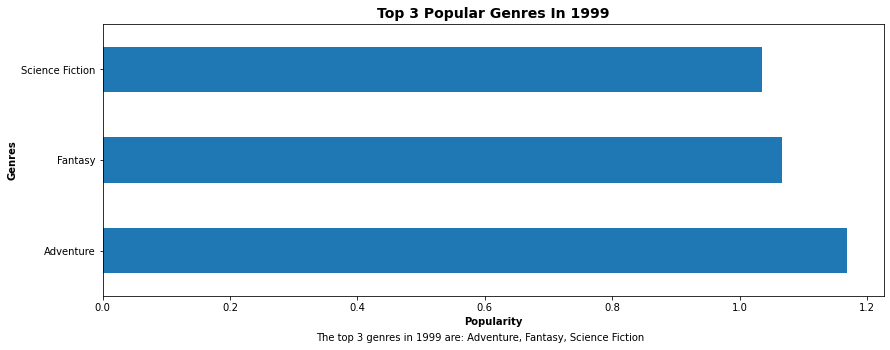

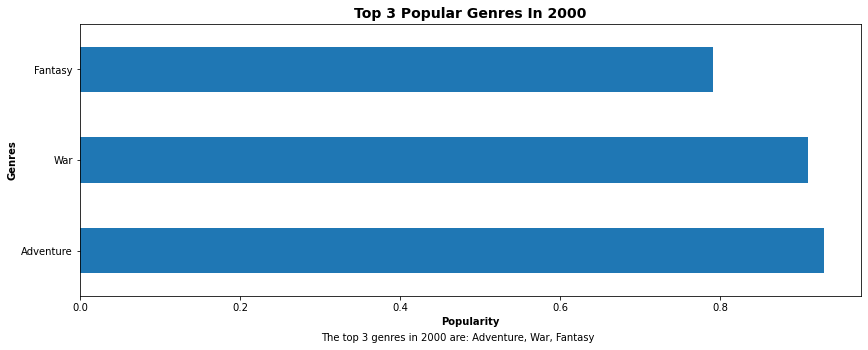

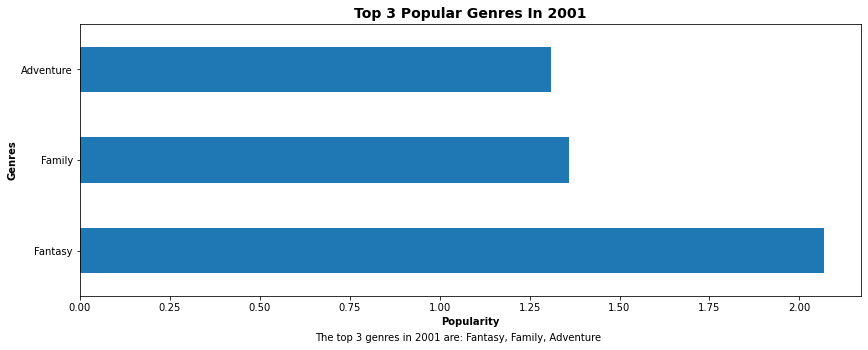

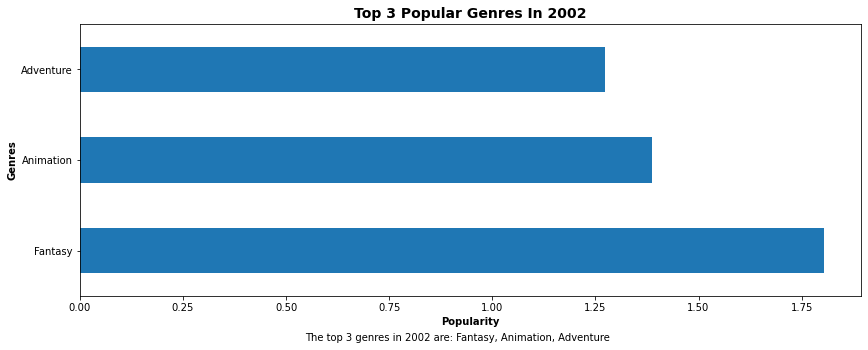

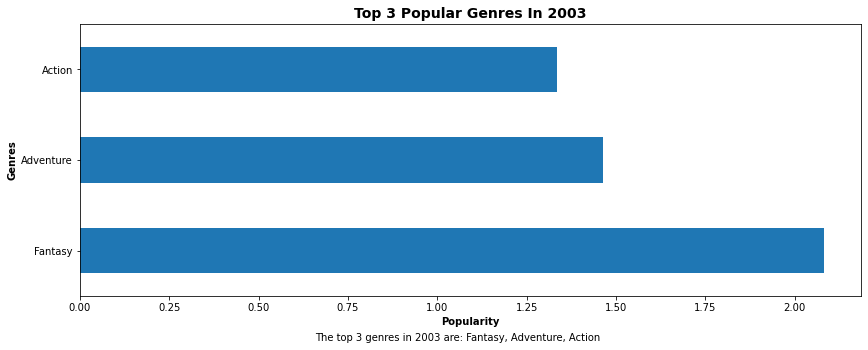

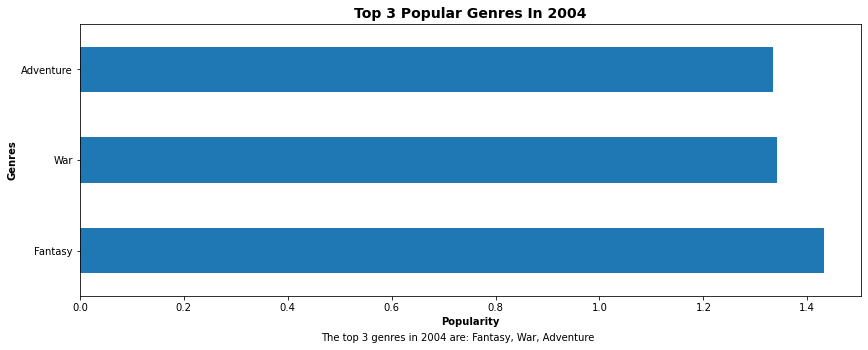

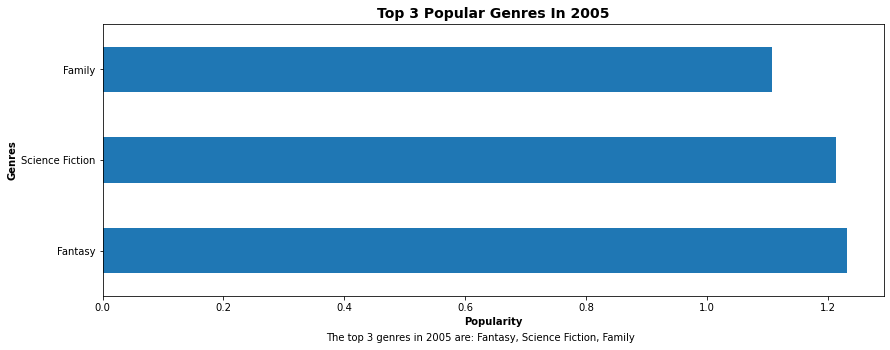

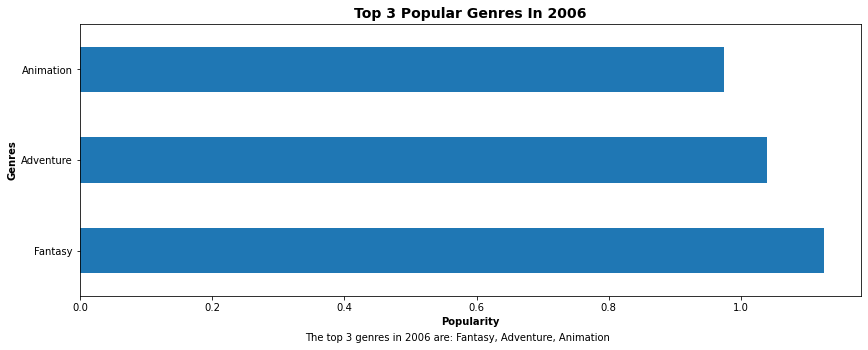

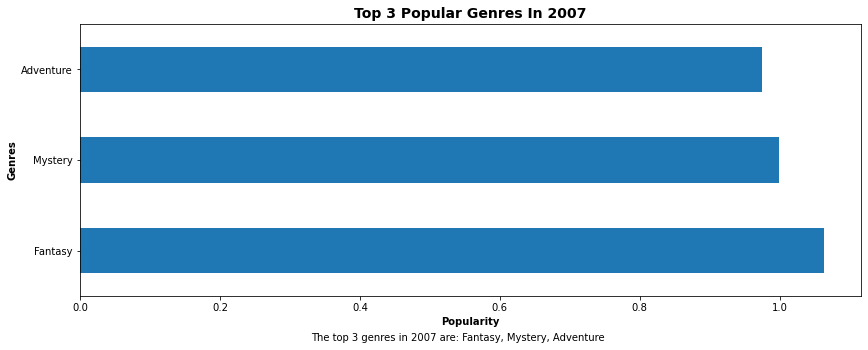

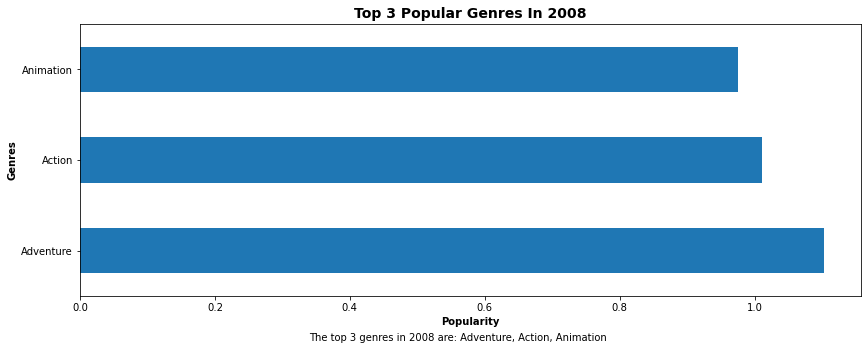

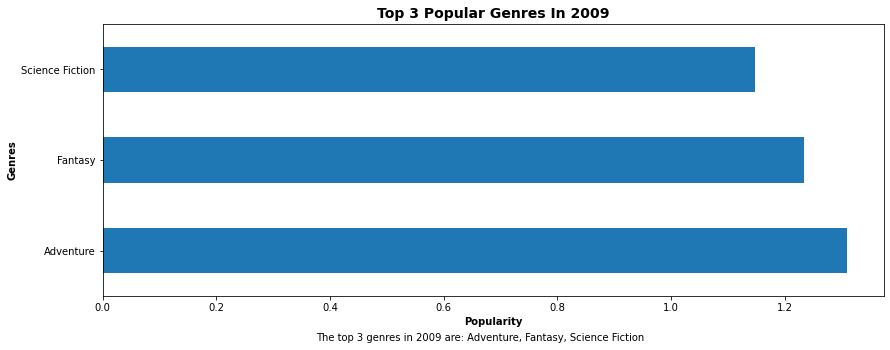

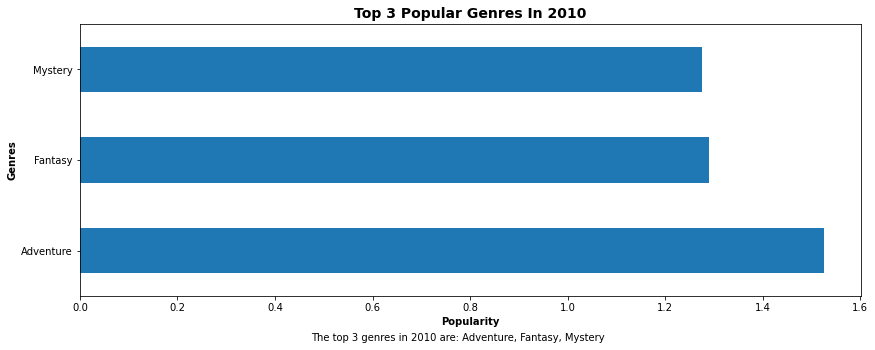

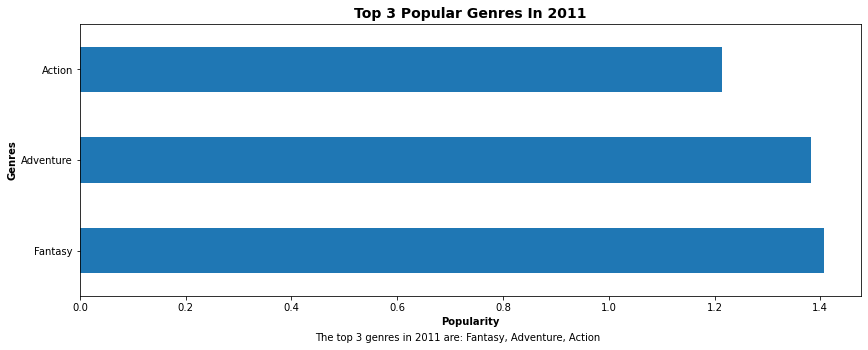

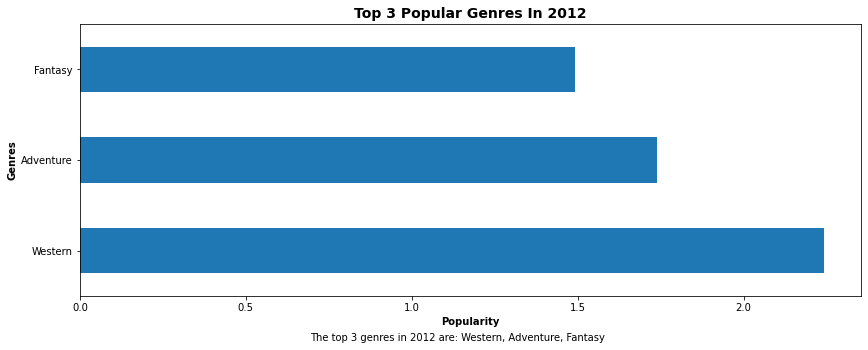

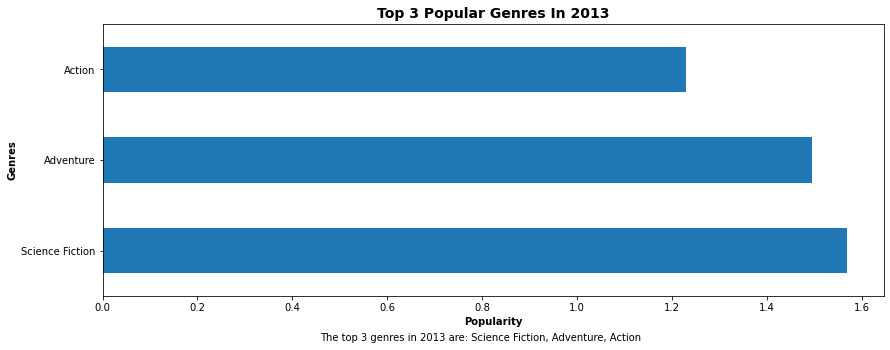

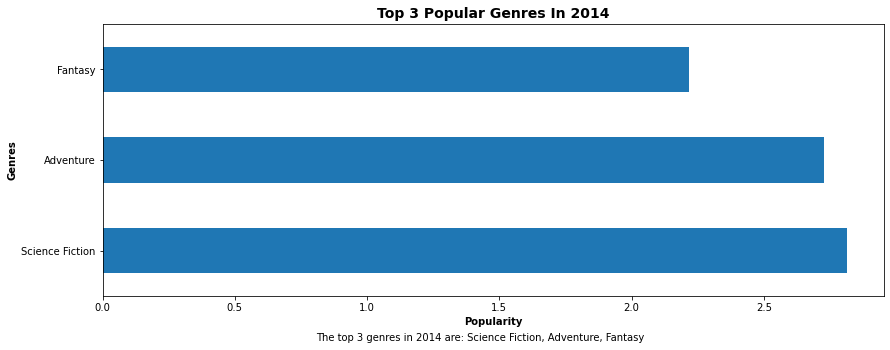

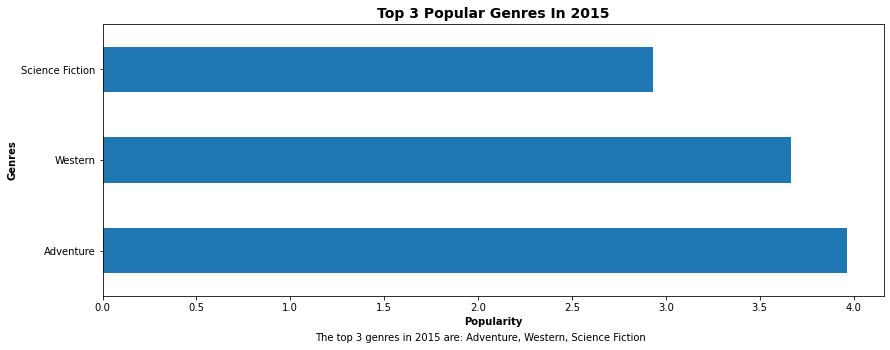

In [15]:
# years Holds all the release_year values in sorted order
years = np.sort(genre_exploded['release_year'].unique())

# We group by release_year and genre here
genre_by_year = genre_exploded.groupby(['release_year', 'genres']).mean()['popularity']

# Plot a graph of top 3 genres per year
for year in years:
    top_genres = genre_by_year[year].sort_values(ascending=False)[0:3]
    title = f'Top 3 Popular Genres in {year}'
    fig = plt.figure()
    fig_text = f'The top 3 genres in {year} are: {top_genres.index[0]}, {top_genres.index[1]}, {top_genres.index[2]}'
    fig.text(.5, .0001, fig_text, ha='center')
    graphPlotter(top_genres, kind='barh', yVar='genres', xVar='popularity', title=title)

### Above we see the most popular genres in the movie industry for each year from 1960 - 2015
### We could look at the average popularity of genres over the years too

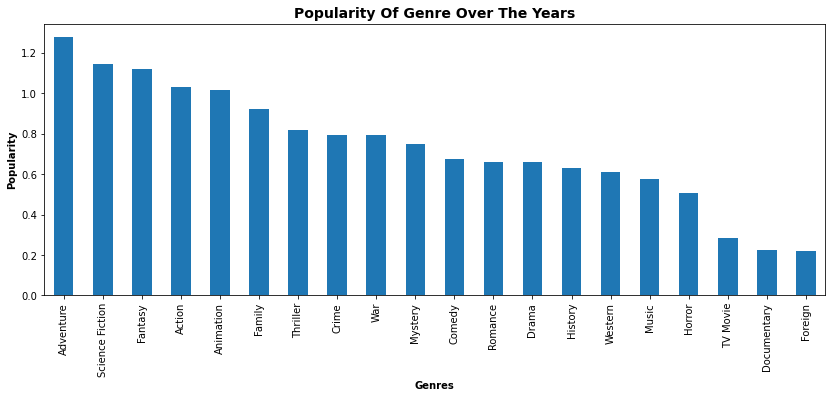

In [16]:
avg_genre_pop = genre_exploded.groupby('genres').mean()['popularity'].sort_values(ascending=False)
title = 'Popularity of Genre over the Years'
graphPlotter(avg_genre_pop, kind='bar', xVar='genres', yVar='popularity', title=title)

### The adventure genre has been the most popular genre over the years
### While the foreign genre has been the least popular

### Research Question 2  (What are the most popular movies over the years ?)

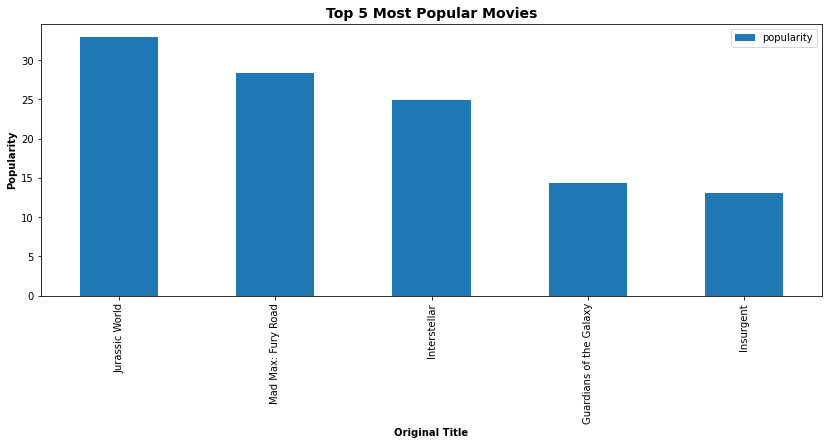

In [17]:
# To get the most popular movies
# We sort the dataset by popularity in a descending order
# Then pick top 5
# The 5 most popular movies
top_5_pop = df.sort_values('popularity', ascending=False).head(5)
title = 'Top 5 Most Popular Movies'
graphPlotter(top_5_pop, kind='bar', xVar='original_title', yVar='popularity', title=title)

### The top five most popular movies over the years are: Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy and Insurgent

### Research Question 3 (Are popular movies more profitable ?)

0.5123267759193015


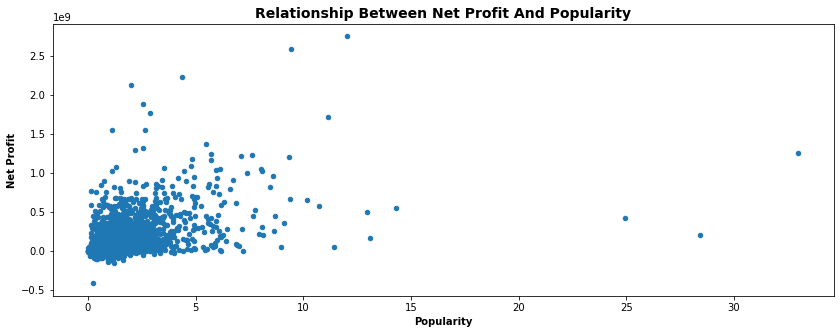

In [18]:
# Are popular movies more profitable ?
graphPlotter(df, kind='scatter', xVar='popularity', yVar='net_profit', title=DEFAULT_TITLE)

print(df.popularity.corr(df['net_profit']));
# Popularity and net_profit seem to be moderately correlated, it is not a strong relationship.


#### Conclusion

#### There seems to be a moderate correlation between popularity and net_profit

### Research Question 4 (What keywords are more popular ?)

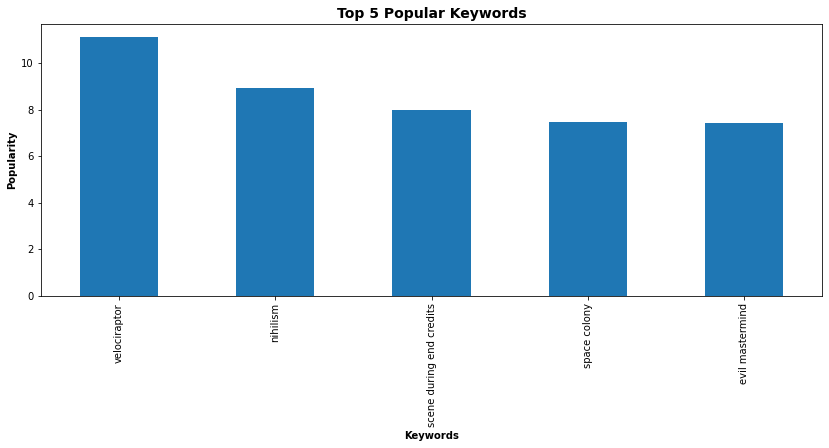

In [19]:
keywords_exploded = df.explode('keywords', ignore_index=True)
popular_keywords = keywords_exploded.groupby('keywords').mean()['popularity'].sort_values(ascending=False).iloc[0:5]
title = 'Top 5 Popular Keywords'
graphPlotter(popular_keywords, kind='bar', xVar='keywords', yVar='popularity', title=title)

#### Conclusion

#### The top 5 Keywords are: velociraptor, nihilism, scene during end credits, space colony, evil mastermind

### Research Question 5 (What are the most profitable genres ?)

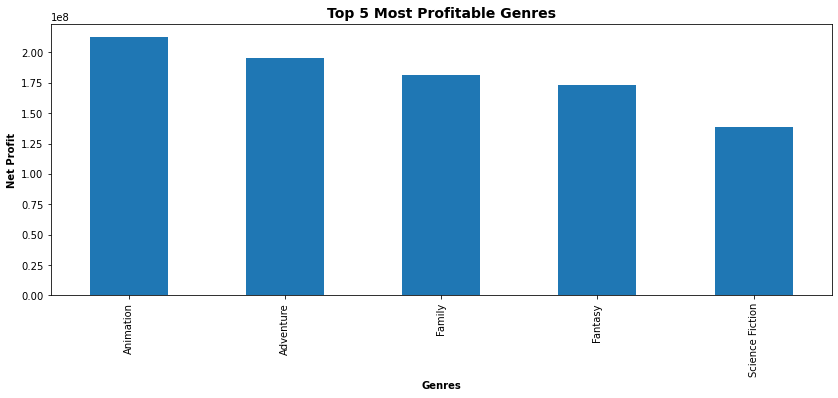

In [20]:
profitable_genres = genre_exploded.groupby('genres').mean()['net_profit'].sort_values(ascending=False).iloc[0:5]
title = 'Top 5 Most Profitable Genres'
graphPlotter(profitable_genres, kind='bar', xVar='genres', yVar='net_profit', title=title)

#### Conclusion

#### The top 5 most profitable genres over the years are Animation, Adventure, Family, Fantasy, Science Fiction

### Research Question 6 (Are certain production companies more successful or profitable over the years?)

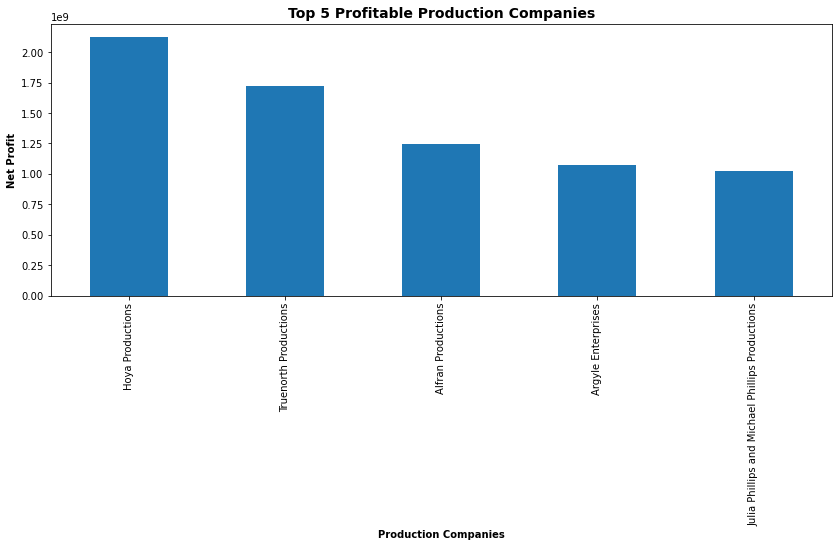

In [21]:
companies_exploded = df.explode('production_companies', ignore_index=True)
profitable_companies = companies_exploded.groupby('production_companies').mean()['net_profit'].sort_values(ascending=False).iloc[0:5]
title = 'Top 5 Profitable Production Companies'
graphPlotter(profitable_companies, kind='bar', xVar='production_companies', yVar='net_profit', title=title)

#### Conclusion

#### Hoya productions have been the most successful production company over the years

### Research Question 7 (What are the most profitable movies ?)

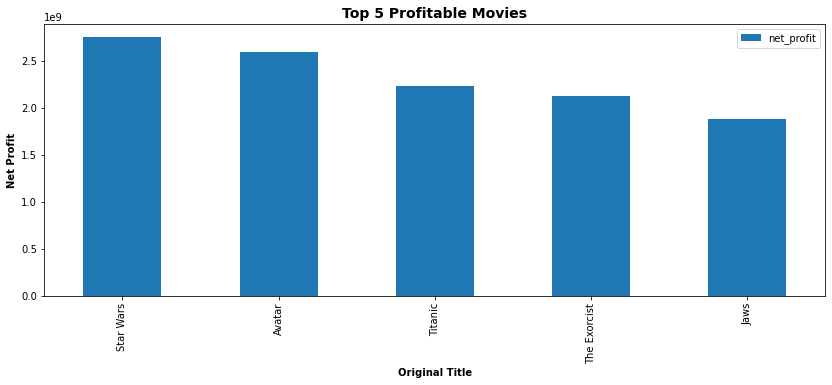

In [22]:
profitable_movies = df.sort_values(by='net_profit', ascending=False).head(5)
title = 'Top 5 Profitable Movies'
graphPlotter(profitable_movies, kind='bar', xVar='original_title', yVar='net_profit', title=title)

#### Conclusion

#### The top 5 most profitable movies are: Star Wars, Avatar, Titanic, the Exorcist, Jaws

### Research Question 8 (How succesful as the movie industry been over the years ?)

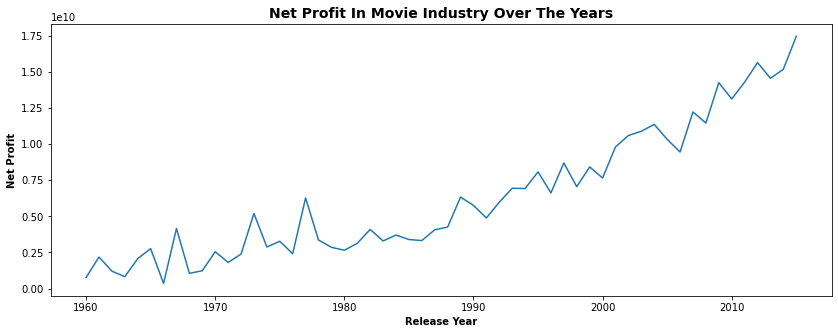

In [23]:
# Is profit in the movie industry rising with year ?
df_success = df.groupby('release_year')['net_profit'].sum()
title = 'Net Profit in Movie Industry over the Years'
graphPlotter(df_success, kind='line', xVar='release_year', yVar='net_profit', title=title)

#### Conclusion

#### Profit in the movie industry seems to be rising over time

### Research Question 9 (Does runtime of a movie in anyway affects profit?)

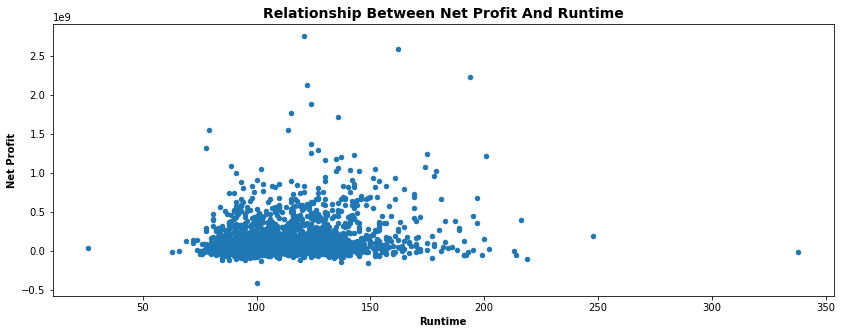

In [24]:
# We could plot a line chart of the relationship between these variables
graphPlotter(df, kind='scatter', xVar='runtime', yVar='net_profit', title=DEFAULT_TITLE)

#### Conclusion

#### Well, no relationship between runtime and net_profit of a movie

### Heatmap

#### To have a picture of how each variables correlate
#### Below is a heatmap of the correlation between variables

<AxesSubplot:>

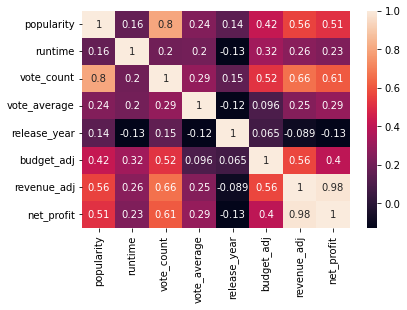

In [25]:
sns.heatmap(df.corr(), annot=True)

### Research Question 10 (What kinds of features are associated with movies that have high revenues ?)

#### Let's try plotting the relations between revenue and some of our variables

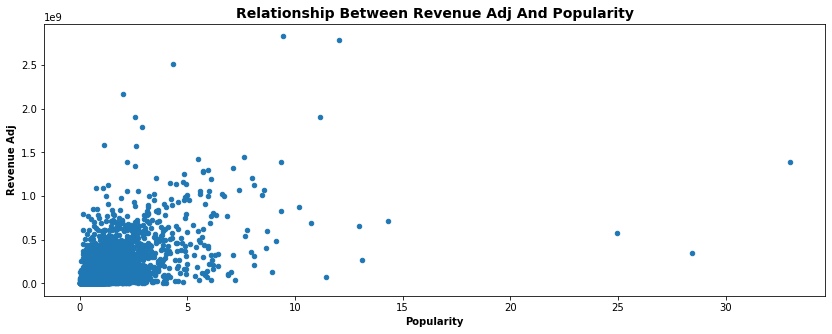

In [26]:
# Relationship between revenue and popularity
graphPlotter(df, kind='scatter', xVar='popularity', yVar='revenue_adj', title=DEFAULT_TITLE)

#### Conclusion

#### There is a moderate relationship between revenue and popularity
#### So popularity may not really be a strong feature of high revenue movies

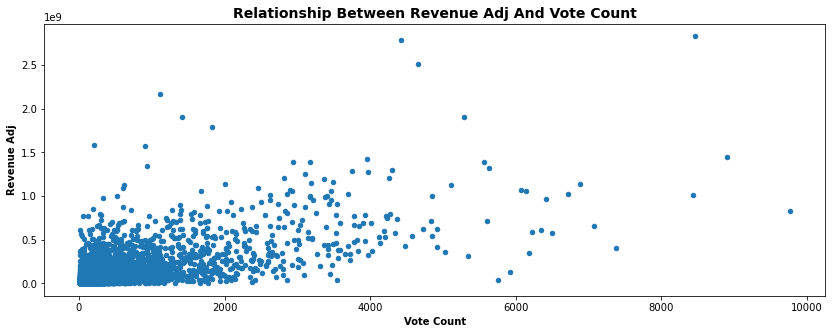

In [27]:
# Relationship between revenue and vote_count
graphPlotter(df, kind='scatter', xVar='vote_count', yVar='revenue_adj', title=DEFAULT_TITLE)

#### Conclusion

#### High revenue movies may tend to receive more votes

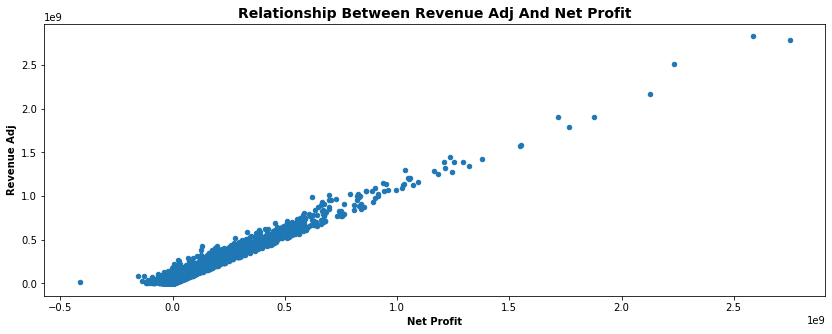

In [28]:
# Relationship between revenue and net_profit
graphPlotter(df, kind='scatter', xVar='net_profit', yVar='revenue_adj', title=DEFAULT_TITLE)

#### Conclusion

#### This makes sense that the higher the revenue the higher the profit

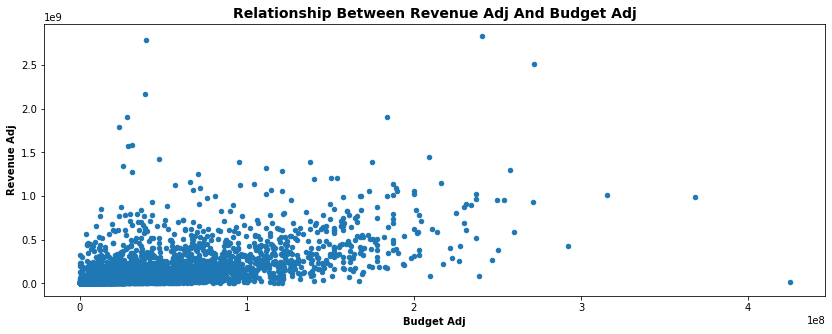

In [29]:
# Relationship between revenue and budget
graphPlotter(df, kind='scatter', xVar='budget_adj', yVar='revenue_adj', title=DEFAULT_TITLE)

#### Conclusiom

#### High revenue movies may slightly have high budget also
#### Not so strong a relationship

<a id='conclusions'></a>
## Conclusions


- Over the years Adventure has been the most popular genre
- While the foreign genre is the least popular
- Jurassic world is the most popular movie
- The relationship between popularity and profitability is not a strong one, so a popular movie may or not be profitable
- The keyword that has been the most popular over the year is 'velociraptor'
- The animation genre has been the most profitable genre in the movie industry
- The Hoya Production Company has been the most successful company in the movie industry
- Star wars is the most profitable movie of all time
- The movie industry is a profitable industry over the years
- Runtime has no effect on the profitability of a movie
- High revenue movies tend to make more profit, and there seems to be a moderate relationship with popularity, budget and vote_count

Limitations:
- Since this is sample data, we still have a level of uncertainty as result may differ on another sample
- Some columns had a lot of missing values
- The budget and revenue columns had many zero values
- The exact currency for the budget and revenue was not stated
- Some columns had values separated by pipe (|)